<a href="https://colab.research.google.com/github/phamducdai092/ML_LAB/blob/main/Lab_10_2130304_PhamDucDai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods** using sklearn api.

*   **Deadline: 23:59, 20/5/2024**



# Import libraries

In [19]:
# code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import svm
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from prettytable import PrettyTable
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics import silhouette_score
from scipy.cluster import hierarchy

In [2]:

from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML/lab10'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML/lab10


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [4]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

clf = svm.SVC(kernel='sigmoid', random_state=0)
svm_scores = cross_validate(clf, X, y, scoring='accuracy', cv=10)

print(sorted(svm_scores.keys()))
print(np.mean(svm_scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.06666666666666668


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest**, **kNN** algorithm with cross validation

In [5]:
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_scores = cross_validate(rf_classifier, X, y, scoring='accuracy', cv=10)

# kNN
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_scores = cross_validate(knn_classifier, X, y, scoring='accuracy', cv=10)

*  1.3 Compare the obtained results of these approaches (SVM, RandomForest, kNN) using PrettyTable

In [6]:
results_table = PrettyTable()
results_table.field_names = ["Algorithm", "Mean Accuracy"]

results_table.add_row(["SVM", np.mean(svm_scores['test_score'])])
results_table.add_row(["Random Forest", np.mean(rf_scores['test_score'])])
results_table.add_row(["kNN", np.mean(knn_scores['test_score'])])

print(results_table)

+---------------+---------------------+
|   Algorithm   |    Mean Accuracy    |
+---------------+---------------------+
|      SVM      | 0.06666666666666668 |
| Random Forest |  0.9666666666666666 |
|      kNN      |  0.9666666666666666 |
+---------------+---------------------+


#Task 2. With fashion dataset:
*   2.1. Apply **K-Means** algorithm using k=10,

In [7]:
fashion_train = pd.read_csv('fashion_train.csv')
X = fashion_train.drop(columns='y')
y = fashion_train[['y']]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

kmeans = KMeans(n_clusters=10,n_init= 10, random_state=42)
kmeans.fit(X)

clusters = kmeans.predict(X)
kmeans.cluster_centers_.shape


(10, 784)

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **SVM** in terms of accuracy, precision, recall, f1 using cross validation.


In [8]:
classifiers = {
    "SVM": svm.SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "kNN": KNeighborsClassifier(n_neighbors=3)
}

results2 = PrettyTable()
results2.field_names = ["Algorithm", "Accuracy", "Precision", "Recall", "F1-score"]

for clf_name, clf in classifiers.items():
    accuracy = cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()
    precision = cross_val_score(clf, X, y, cv=5, scoring='precision_macro').mean()
    recall = cross_val_score(clf, X, y, cv=5, scoring='recall_macro').mean()
    f1 = cross_val_score(clf, X, y, cv=5, scoring='f1_macro').mean()
    results2.add_row([clf_name, round(accuracy, 4), round(precision, 4), round(recall, 4), round(f1, 4)])

print("Results:")
print(results2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Results:
+---------------+----------+-----------+--------+----------+
|   Algorithm   | Accuracy | Precision | Recall | F1-score |
+---------------+----------+-----------+--------+----------+
|      SVM      |  0.795   |   0.8103  | 0.7989 |  0.7991  |
| Random Forest |  0.788   |   0.7977  | 0.7977 |  0.7998  |
|      kNN      |  0.757   |   0.7791  | 0.7633 |  0.7605  |
+---------------+----------+-----------+--------+----------+


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

2.4. Apply **AgglomerativeClustering** algorithm to fashion dataset using the number of clusters is 10

In [10]:

def evaluate_agglomerative_clustering(X):
    clf = AgglomerativeClustering(n_clusters=10)
    labels = clf.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    return silhouette

silhouette_score_agglomerative = evaluate_agglomerative_clustering(X)

print("Agglomerative Clustering:")
print("Silhouette Score:", round(silhouette_score_agglomerative, 4))

Agglomerative Clustering:
Silhouette Score: 0.1265


#Task 3.
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





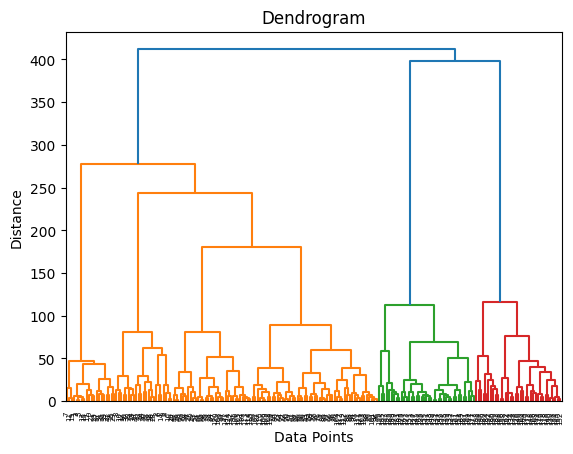

In [20]:
shopping = pd.read_csv('shopping-data.csv')

X = shopping.drop(['CustomerID', 'Genre'], axis=1)
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

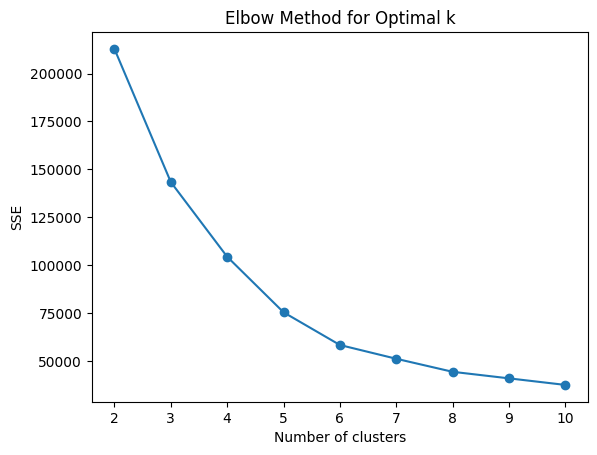

In [21]:
sse = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot SSE values for different k
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [22]:
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_clustering.fit_predict(X)

# Print cluster labels
print("Cluster Labels:", agg_labels)

Cluster Labels: [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 0 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


#Finally,
Save a copy in your Github. Remember renaming the notebook.